# Laboratorio. Árboles y random forest para regresión y clasificación
# Carlos Andrés Giraldo Osorio

# Librerías utilizadas

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree, DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import preprocessing   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.model_selection import learning_curve, cross_val_score, KFold, train_test_split
import seaborn as sn 
import math

In [4]:
semilla_aleatoria = 1234

# 1. Analisis desriptivo de los datos

In [5]:
df_base=pd.read_csv("pima-indians-diabetes.csv")
display(df_base.head(5))

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_base.dtypes

nEmbarazos                    int64
concentracionGlucosa          int64
presionArterialSistolica      int64
pliegueCutaneo                int64
insulinaSerica                int64
IMC                         float64
funcionPediDiabe            float64
edad                          int64
diabetes                      int64
dtype: object

a. De los tipos de datos que se pueden observar se puede concluir que todas las columnas pertenecen a valores numéricos. Aun así, la columna "diabetes" se refiere a si la persona tiene o no diabetes, lo cual, aunque este llena con unos y ceros, es una variable categorica de 2 opciones.

In [7]:
display(df_base.describe())

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


b. Los registros parecen estar completos por el count pero si nos fijamos en los valores mínimos, hay variables que no deberían estar en 0, razón por la cuál, se deduce que estas variables en realidad si tienen valores faltantes. Todas las columnas parecen tener buena cantidad de datos fiables y parecen ser importantes, por lo tanto se concluye que ninguna variable se debería eliminar.

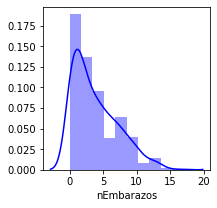

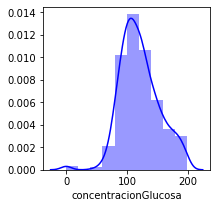

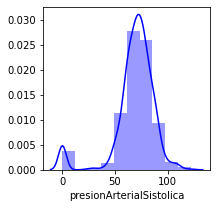

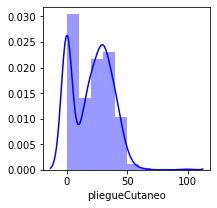

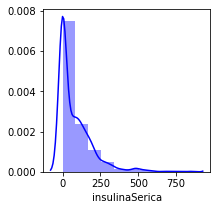

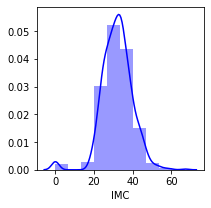

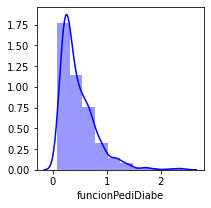

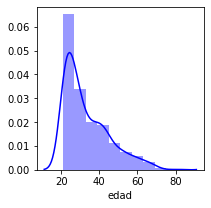

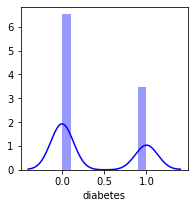

In [8]:
plt.figure(figsize=(3, 3))
sn.distplot(df_base['nEmbarazos'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['concentracionGlucosa'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['presionArterialSistolica'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['pliegueCutaneo'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['insulinaSerica'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['IMC'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['funcionPediDiabe'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['edad'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['diabetes'], color='b', bins=10, hist_kws={'alpha': 0.4});


c. Las gráficas nos confirman lo concluido en el punto anterior, ya que, se puede observar que algunas tienen un pequeño pico en el valor de 0. Además podemos observar que hay mas registros de personas sin diabetes que de personas con diabetes. De manera general, la mayoría de las columnas siguen una disttribución normal, otras como nEmbarazos o insulinaSerica pareciera tener una distribución poisson.  

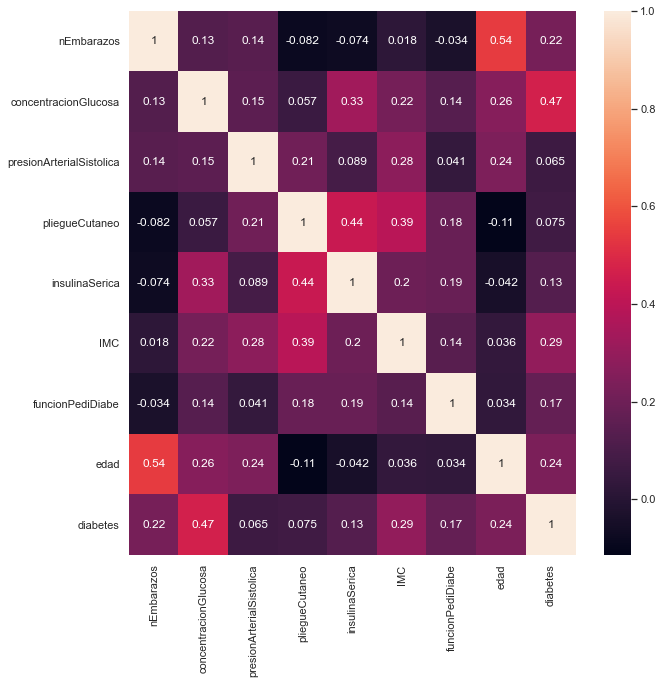

In [9]:
matriz_correlacion=df_base.corr()
sn.set(rc={'figure.figsize':(10,10)})
sn.heatmap(matriz_correlacion, annot=True)
plt.show()

d. Las variables con correlacion más alta son edad con diabetes, concentracionGlucosa con diabetes y pliegueCutaneo con insulinaSerica , aun así, la correlación es mucho menor a 0.6 lo cuál aunque sean las mayores, no es suficiente para definir que una de la variables pueda suplir la otra. Además, la diabetes es una variable presente en dos de las correlaciones anteriormente mencionadas, por lo cual se concluye, que las otras dos variables que acompañaban a "diabetes" son muy importantes a la hora de determinar si una persona tiene diabetes o no.

# 2. Tratamiento de valores faltantes. 

In [10]:
col_total_nulos = df_base.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres)

Series([], dtype: int64)

In [11]:
(df_base==0).sum(axis=0)

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

a. Como se mencionó anteriormente, la presencia de valores 0 en variables como "IMC" y "concentracionGlucosa" en 0, no son posibles, razón por la cuál se deduce que en relaidad se trata de valores faltantes. Estos variables se deberán reemplazar por nan para ser tratados como valores faltantes y rellenarlos como alguna de las técnicas que se vieron en clase.

In [12]:
cols = ['concentracionGlucosa','presionArterialSistolica','pliegueCutaneo','insulinaSerica','IMC']
df_base[cols] = df_base[cols].replace({0:np.nan})
print(df_base.isnull().sum())

nEmbarazos                    0
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64


Una vez se reliza las conversión de 0 a nan en las columnas indicadas en el código anterior se puede apreciar la cantidad real de valores faltantes.

# 3. Entrenamiento de algoritmos.

Para cada uno de los escenarios de rellenado de variables faltantes se hizo un dataframe.

In [13]:
df_no_row_nan = df_base.copy()
df_no_row_nan.dropna(inplace=True, axis = 0)

df_no_column_nan = df_base.copy()
df_no_column_nan.dropna(inplace=True, axis = 1)

df_media = df_base.copy()
df_media.fillna(df_media.mean(), inplace=True)

df_interpolacion = df_base.copy()
df_interpolacion.interpolate(method='spline', order=1, limit=10, limit_direction='both', inplace=True)

print('ok')

ok


In [14]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

In [15]:
clas_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',       
            random_state=semilla_aleatoria, 
            splitter='best')

clas_rndforest = RandomForestClassifier(n_estimators=100)

## 3.1. Dataframe sin filas con valores nan

In [16]:
columnas_x=df_no_row_nan.columns.difference(['diabetes'])
X=df_no_row_nan[columnas_x]
Y=df_no_row_nan['diabetes']

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

### 3.1.1. Arbol de decisión

In [17]:
clas_arboles.fit(train_x,train_y)
predEY_clas_arb=clas_arboles.predict(test_x)

array([[44, 11],
       [12, 12]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        55
           1       0.52      0.50      0.51        24

    accuracy                           0.71        79
   macro avg       0.65      0.65      0.65        79
weighted avg       0.71      0.71      0.71        79



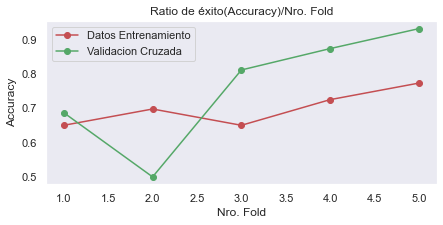

In [18]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

###### Conclusión arbol de decisión
Lo primero es definir que el objetivo principal del modelo es predecir si una persona sufre de diabetes.
En este modelo, de arbol de desición y eliminando todos los registros que tuvieran algún dato faltante, se puede apreciar que la exactitud es muy inestable. 
La matriz de confusión confirma esto, dado que, la precisión y el recall para definir si una persona tiene diabetes es muy baja, muy cercana al 50%.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, solo en el 52% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 50%.

### 3.1.2. Random forest

In [19]:
clas_rndforest.fit(train_x,train_y)
predEY_clas_rfor=clas_rndforest.predict(test_x)

array([[47,  8],
       [10, 14]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.64      0.58      0.61        24

    accuracy                           0.77        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.77      0.77      0.77        79



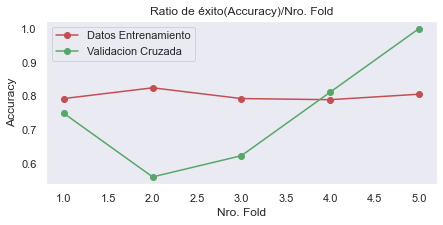

In [20]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_rfor))
class_report=classification_report(test_y,predEY_clas_rfor)
print(class_report)

###### Conclusión random forest
En este modelo, de random forest y eliminando todos los registros que tuvieran algún dato faltante, se puede apreciar que al igual que en el caso de arbol de decision, la exactitud es muy inestable, con picos muy altos y picos muy bajos. 
El f1-score nos muestra que de manera general el uso del random forest mejora ligeramente el rendimiento del modelo.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, el 64% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 58%.

### Conclusión de la técnica de tratamiento de datos faltantes
La eliminación de registros que tuvieran algún dato faltante claramente afectó enormemente la estabilidad del los modelos. Probablemente quedarón muy pocos datos para poder tener un buen rendmiento, la falta de datos provocá el comportamiento visto anteriormente donde un grupo de registros muestra una exactitud y otro grupo de registros muestra una exactitud completamente diferente. En conclusión ninguno de los modelos anteriores podría ser confiable y menos para un tema de salud.

## 3.2. Dataframe sin columnas con valores nan

In [21]:
columnas_x=df_no_column_nan.columns.difference(['diabetes'])
X=df_no_column_nan[columnas_x]
Y=df_no_column_nan['diabetes']

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

### 3.2.1. Arbol de decisión

In [22]:
clas_arboles.fit(train_x,train_y)
predEY_clas_arb=clas_arboles.predict(test_x)

array([[67, 32],
       [39, 16]], dtype=int64)

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        99
           1       0.33      0.29      0.31        55

    accuracy                           0.54       154
   macro avg       0.48      0.48      0.48       154
weighted avg       0.53      0.54      0.53       154



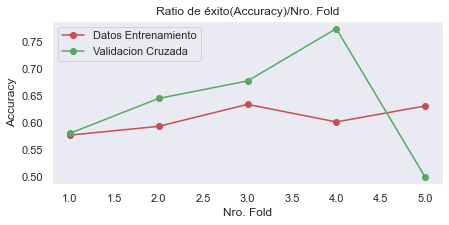

In [23]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

###### Conclusión arbol de decisión
Este modelo presenta el mismo comportamiento de exactitud inestable apreciado anteriormente. 
La matriz de confusión muestra un comportamiento donde la presicion y el recall son muy bajos. 
Quiere decir que de los positivos que pedijo el modelo el 33% de estas predicciones estuvieron bien pero estas solo representaban el 29% de los positivos reales.

### 3.2.2. Random forest

In [24]:
clas_rndforest.fit(train_x,train_y)
predEY_clas_rfor=clas_rndforest.predict(test_x)

array([[78, 21],
       [38, 17]], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.79      0.73        99
           1       0.45      0.31      0.37        55

    accuracy                           0.62       154
   macro avg       0.56      0.55      0.55       154
weighted avg       0.59      0.62      0.60       154



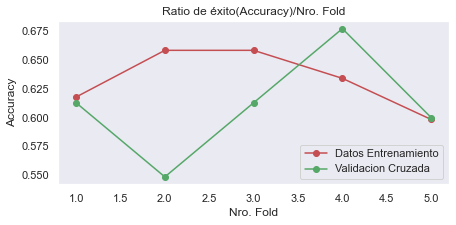

In [25]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_rfor))
class_report=classification_report(test_y,predEY_clas_rfor)
print(class_report)

###### Conclusión random forest
Al comparación con los anteriores casos, la exactitud es un poco más estable. En este caso el f1-score demuestra que no siempre el uso de random forest mejor el rendimieto de un modelo. De los positivos que pedijo el modelo el 45% de estas predicciones estuvieron bien pero estas solo representaban el 31% de los positivos reales.

### Conclusión de la técnica de tratamiento de datos faltantes
La eliminación de columnas copletas por tener datos faltantes claramente tambien es una muy mala técnica, la falta de datos hizo que el modelo se comportará peor incluso que simplemente lanzar una moneda al aire. Al igual que en la anterior técnica de tratamiento de datos faltantes, la conclusión es que ninguno de los modelos anteriores es confiable y menos para un tema de salud.

## 3.3. Dataframe con valores nan llenados con la media

In [26]:
columnas_x=df_media.columns.difference(['diabetes'])
X=df_media[columnas_x]
Y=df_media['diabetes']

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

### 3.3.1. Arbol de decisión

In [27]:
clas_arboles.fit(train_x,train_y)
predEY_clas_arb=clas_arboles.predict(test_x)

array([[72, 27],
       [24, 31]], dtype=int64)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.53      0.56      0.55        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.67      0.67       154



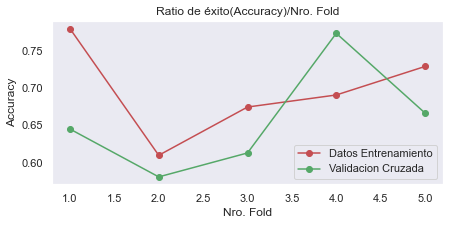

In [28]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

###### Conclusión arbol de decisión
Para este caso la exactitud tambien mejora con respecto a los casos anteriores. 
La matriz de confusión por su parte no muestra datos tan alentadores.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, solo en el 53% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 56%.

### 3.3.2. Random forest

In [29]:
clas_rndforest.fit(train_x,train_y)
predEY_clas_rfor=clas_rndforest.predict(test_x)

array([[85, 14],
       [24, 31]], dtype=int64)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



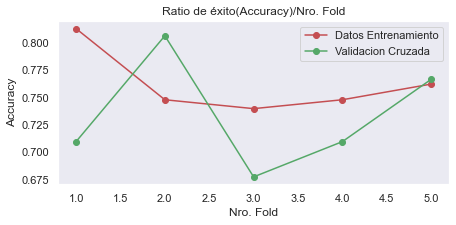

In [30]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_rfor))
class_report=classification_report(test_y,predEY_clas_rfor)
print(class_report)

###### Conclusión random forest
Aunque en este modelo se observa mayor inestabilidad en la exactitud con respecto al anterior modelo de arboles de decisión, la matriz de confusión nos dice que su rendimiento mejora.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, el 69% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 56%.

### Conclusión de la técnica de tratamiento de datos faltantes
El llenado de datos faltantes con la media es mucho mejor que eliminar reesgitros o variables completas, aun así, no es suficiente para garantizar un buen rendimiento del modelo. Aún sigue siendo inestable y la eficiencia es muy baja. Al igual que en las anteriores técnicas de tratamiento de datos faltantes, la conclusión es que ninguno de los modelos anteriores es confiable y menos para un tema de salud.

## 3.4. Dataframe con valores nan llenados con insterpolacion

In [31]:
columnas_x=df_interpolacion.columns.difference(['diabetes'])
X=df_interpolacion[columnas_x]
Y=df_interpolacion['diabetes']

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

### 3.4.1. Arbol de decisión

In [32]:
clas_arboles.fit(train_x,train_y)
predEY_clas_arb=clas_arboles.predict(test_x)

array([[72, 27],
       [29, 26]], dtype=int64)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        99
           1       0.49      0.47      0.48        55

    accuracy                           0.64       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.63      0.64      0.63       154



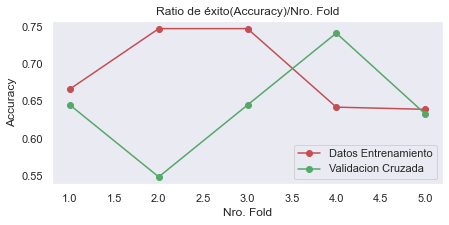

In [33]:
graficar_accuracy_scores(clas_arboles,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

###### Conclusión arbol de decisión.
Este modelo mantiene lo visto anteriormente de tener una exactitud muy variable. 
La matriz de confusión confirma además nos muestra que el rendimiento tambien fue malo.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, solo en el 49% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 47%.

### 3.4.2. Random forest

In [34]:
clas_rndforest.fit(train_x,train_y)
predEY_clas_rfor=clas_rndforest.predict(test_x)

array([[87, 12],
       [23, 32]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



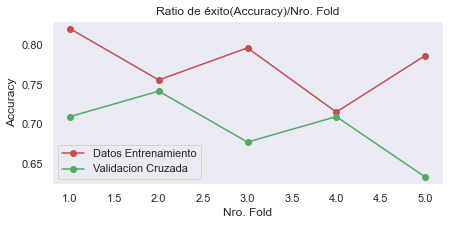

In [35]:
graficar_accuracy_scores(clas_rndforest,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

display(confusion_matrix(test_y,predEY_clas_rfor))
class_report=classification_report(test_y,predEY_clas_rfor)
print(class_report)

###### Conclusión random forest
Este modelo es el que presenta una gráfica de exactitud más estable. Esto es importante, ya que, es el mas confiable para ser usado en un entorno real, con nuevos datos.
La matriz de confusión mejoro con respecto a todos los modelos anterores.
La presición nos dice que de todas las veces que que el modelo predijo que una persona si tenia diabetes, el 73% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo solo predijo correctamente el 58%.

### Conclusión de la técnica de tratamiento de datos faltantes
La interpolación de datos es una mejor técnica de tratamiento de datos faltantes que la técnica de eliminar registros o variables, aun así, no se puede asegurar esto con respecto a rellenarlos con la media, ya que, con random forest mejoró el resultado pero con arboles de decisión no. El random forest con esta técnica fue el mejor modelo que hubo pero los vaores siguen siendo poco confiables, para un tema de salud, valores tan bajos de presición y exactitud no deberían ser usados en un entorno real, quizás pueda ser usado como guía pero no para tomar la última decisión para dar un diagnóstico

# 4.Conclusiones generales

- El número de variables que se tuevieron en cuenta para hacer un diagnóstico sobre diabetes fueron muy pocas, se deberían tener más variables para que pueda ser más preciso el modelo.
- Para un estudio futuro, el número de datos faltantes tambien se debería reducir, esto hace que el modelo entrene con datos reales y no con valores calculados.
- Para un estudio futuro tambien sería bueno contar con un mayor número de registros, la posibillidad de hallar una tendencia es mayor y puede mejorar la estabilidad del modelo.
- Los árboles de decisión y el random forest aunque son técnicas de machine learning fáciles y rápidas de implementar, su precisión y exactitud son muy bajas, para temas de salud sería preferible implementar otra técnica.
- Hay diferencias con respecto a la guía original pero se dan por el uso de ciertas variables que podrían ser diferentes, tales como, en RandomForestClassifier, el valor de n_estimators, en cross_val_score el valor de n_jobs y el test_size para la división de datos en entrenamiento y testing, entre otros.